<a href="https://colab.research.google.com/github/OrionXV/OtherMLProjects/blob/main/BasicTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Janatahack: Cross-sell Prediction

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
%config InLineBackend.figure_format = 'png'

Train : https://drive.google.com/file/d/1eOXjkgtK287ptxQs9Xa7dAkxXVCpYCvf/view?usp=sharing

Test : https://drive.google.com/file/d/1QpTmm8FddCOIk9fJJViG_sOGYsqX04ho/view?usp=sharing

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eOXjkgtK287ptxQs9Xa7dAkxXVCpYCvf' -O train.csv

--2022-02-27 20:06:59--  https://docs.google.com/uc?export=download&id=1eOXjkgtK287ptxQs9Xa7dAkxXVCpYCvf
Resolving docs.google.com (docs.google.com)... 172.217.204.102, 172.217.204.139, 172.217.204.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4eofhn2ld2ju5ng2ovnq7602der4actv/1645992375000/04989237414475792611/*/1eOXjkgtK287ptxQs9Xa7dAkxXVCpYCvf?e=download [following]
--2022-02-27 20:07:00--  https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4eofhn2ld2ju5ng2ovnq7602der4actv/1645992375000/04989237414475792611/*/1eOXjkgtK287ptxQs9Xa7dAkxXVCpYCvf?e=download
Resolving doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QpTmm8FddCOIk9fJJViG_sOGYsqX04ho' -O test.csv

--2022-02-27 20:07:01--  https://docs.google.com/uc?export=download&id=1QpTmm8FddCOIk9fJJViG_sOGYsqX04ho
Resolving docs.google.com (docs.google.com)... 108.177.13.102, 108.177.13.139, 108.177.13.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.13.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e6ss3omt747i0em5h236o6mni1rlelju/1645992375000/04989237414475792611/*/1QpTmm8FddCOIk9fJJViG_sOGYsqX04ho?e=download [following]
--2022-02-27 20:07:02--  https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e6ss3omt747i0em5h236o6mni1rlelju/1645992375000/04989237414475792611/*/1QpTmm8FddCOIk9fJJViG_sOGYsqX04ho?e=download
Resolving doc-14-a0-docs.googleusercontent.com (doc-14-a0-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-14-a0-docs.googleusercontent.com (doc-14-a0-docs.goo

In [ ]:
train = pd.read_csv("train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
#t_df, val_df = train_test_split(train, test_size = 0.2)
t_df = train.copy()

In [ ]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
t_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
t_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Gender, Vehicle_Age, Vehincle_Damage are object <br>
Region_Code, Annula_Premium, Policy_Sales_channel are float64 <br>

Use Label Encoder/One Hot Encoder for Gender and Vehicle_Damage since it only has two categories. 
Use Label Encoder for Vehicle Age, since it is ordinal 





Label Encoder and one-hot encoder are towo different concepts -> go through

> Indented block



In [ ]:
t_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
t_df["Vehicle_Age"].unique(), 

(array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object),)

In [ ]:
pd.crosstab(t_df["Response"], t_df["Previously_Insured"])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


In [ ]:
t_df.pivot_table(
    ["Age", "Annual_Premium", "Vintage"],
    ["Response"],
    aggfunc = ["median", "mean"]
)

median                              mean                           
            Age Annual_Premium Vintage        Age Annual_Premium     Vintage
Response                                                                    
0            34        31504.0     154  38.178227   30419.160276  154.380243
1            43        33002.0     154  43.435560   31604.092742  154.112246

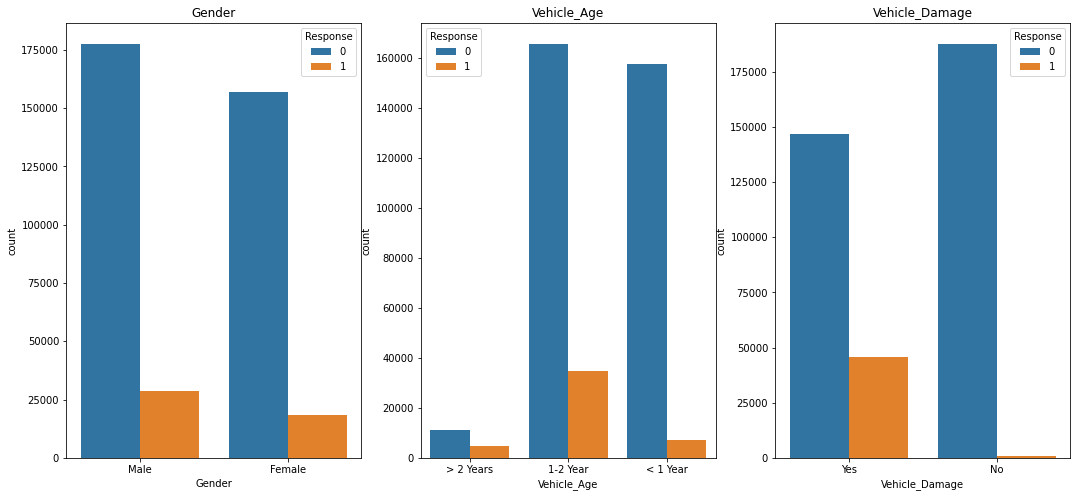

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,8), sharey = False)
for i, x in enumerate(["Gender", "Vehicle_Age", "Vehicle_Damage"]):
    sns.countplot(x, hue= "Response", data = t_df,   ax = axes[i])
    axes[i].set_title(x)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec7702e590>,
      dtype=object)

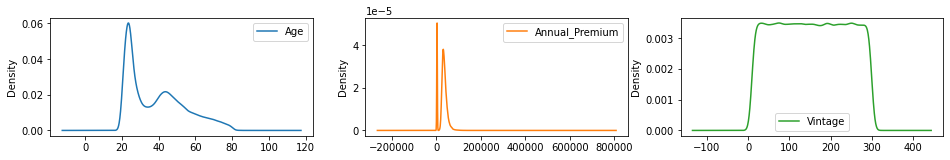

In [ ]:
t_df[["Age", "Annual_Premium", "Vintage"]].plot(
    kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (16,10)
)

In [ ]:
cols = ["Region_Code", "Annual_Premium", "Policy_Sales_Channel"]
for x in cols:
    t_df[x] = t_df[x].astype("int64")

In [ ]:
def MyEncoder(col):
    encoder = preprocessing.LabelEncoder()
    newcol = encoder.fit_transform(col)
    return newcol, encoder 

In [ ]:
'''
Coder_Gender = preprocessing.LabelEncoder()
Coder_Vehicle_Age = preprocessing.LabelEncoder()
Coder_Vehicle_Damage = preprocessing.LabelEncoder()
'''

'\nCoder_Gender = preprocessing.LabelEncoder()\nCoder_Vehicle_Age = preprocessing.LabelEncoder()\nCoder_Vehicle_Damage = preprocessing.LabelEncoder()\n'

In [ ]:
'''
t_df["Gender"] = Coder_Gender.fit_transform(t_df["Gender"])
t_df["Vehicle_Age"] = Coder_Vehicle_Age.fit_transform(t_df["Vehicle_Age"])
t_df['Vehicle_Damage'] = Coder_Vehicle_Damage.fit_transform(t_df['Vehicle_Damage'])
'''

'\nt_df["Gender"] = Coder_Gender.fit_transform(t_df["Gender"])\nt_df["Vehicle_Age"] = Coder_Vehicle_Age.fit_transform(t_df["Vehicle_Age"])\nt_df[\'Vehicle_Damage\'] = Coder_Vehicle_Damage.fit_transform(t_df[\'Vehicle_Damage\'])\n'

In [ ]:
EncoderDic = {}
for c in t_df.select_dtypes(include = 'object').columns.tolist():
    t_df[c], EncoderDic[c] = MyEncoder(t_df[c])
    
EncoderDic

{'Gender': LabelEncoder(),
 'Vehicle_Age': LabelEncoder(),
 'Vehicle_Damage': LabelEncoder()}

In [ ]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    381109 non-null  int64
 1   Gender                381109 non-null  int64
 2   Age                   381109 non-null  int64
 3   Driving_License       381109 non-null  int64
 4   Region_Code           381109 non-null  int64
 5   Previously_Insured    381109 non-null  int64
 6   Vehicle_Age           381109 non-null  int64
 7   Vehicle_Damage        381109 non-null  int64
 8   Annual_Premium        381109 non-null  int64
 9   Policy_Sales_Channel  381109 non-null  int64
 10  Vintage               381109 non-null  int64
 11  Response              381109 non-null  int64
dtypes: int64(12)
memory usage: 34.9 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec74c36590>,
      dtype=object)

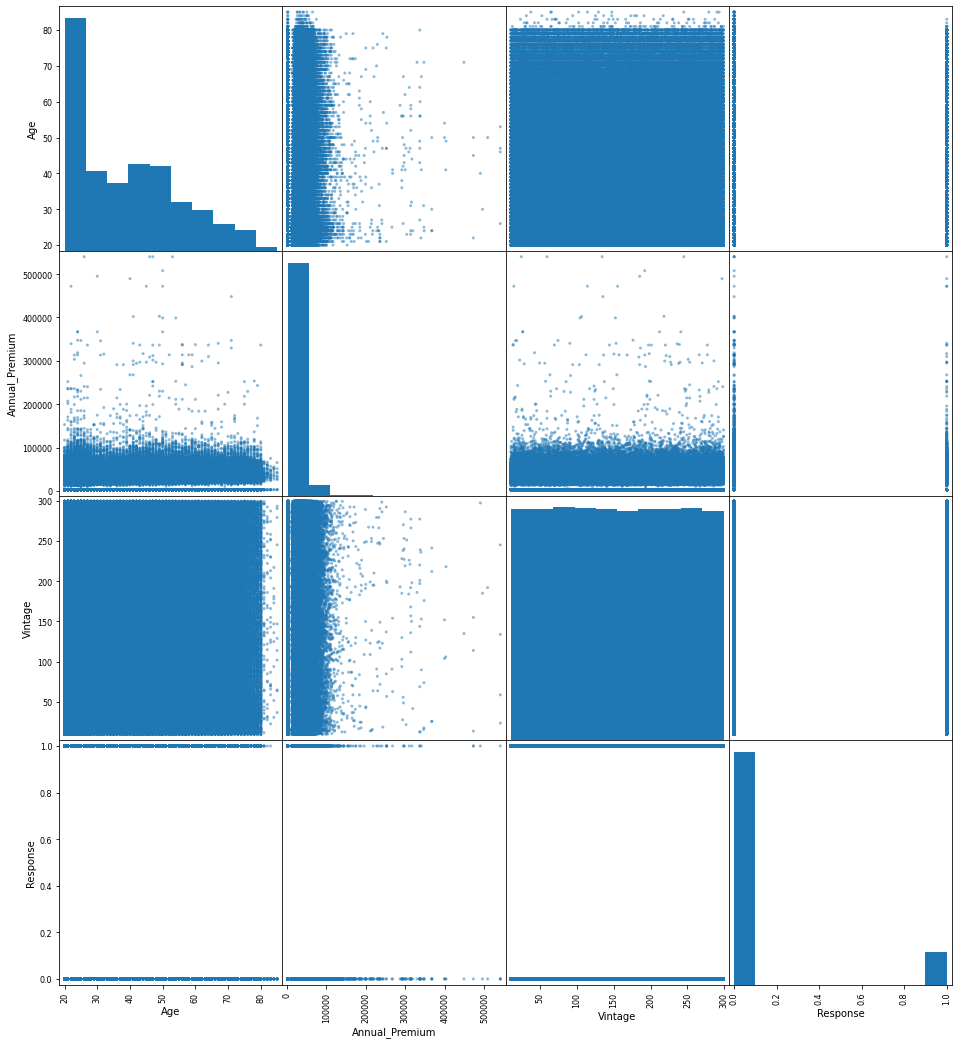

In [ ]:
nice_cols = ["Age", "Annual_Premium", "Vintage", "Response"]
from pandas.plotting import scatter_matrix
scatter_matrix(
    t_df[nice_cols],
    figsize = (16,18),
)

In [ ]:
def colGen(data, colList):
    newData = data.copy().replace({0: None})

    for col1 in colList:
        for col2 in colList:
            if col1 != col2:
                data[col1 + "_per_" + col2] = newData[col1]//newData[col2]
                data[col1 + "_per_" + col2] = data[col1 + "_per_" + col2].astype("int64")


In [ ]:
nice_cols.remove("Response") if "Response" in nice_cols else nice_cols
colGen(t_df, nice_cols)

t_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_per_Annual_Premium,Age_per_Vintage,Annual_Premium_per_Age,Annual_Premium_per_Vintage,Vintage_per_Age,Vintage_per_Annual_Premium
0,1,1,44,1,28,0,2,1,40454,26,217,1,0,0,919,186,4,0
1,2,1,76,1,3,0,0,0,33536,26,183,0,0,0,441,183,2,0
2,3,1,47,1,28,0,2,1,38294,26,27,1,0,1,814,1418,0,0
3,4,1,21,1,11,1,1,0,28619,152,203,0,0,0,1362,140,9,0
4,5,0,29,1,41,1,1,0,27496,152,39,0,0,0,948,705,1,0


In [ ]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   id                          381109 non-null  int64
 1   Gender                      381109 non-null  int64
 2   Age                         381109 non-null  int64
 3   Driving_License             381109 non-null  int64
 4   Region_Code                 381109 non-null  int64
 5   Previously_Insured          381109 non-null  int64
 6   Vehicle_Age                 381109 non-null  int64
 7   Vehicle_Damage              381109 non-null  int64
 8   Annual_Premium              381109 non-null  int64
 9   Policy_Sales_Channel        381109 non-null  int64
 10  Vintage                     381109 non-null  int64
 11  Response                    381109 non-null  int64
 12  Age_per_Annual_Premium      381109 non-null  int64
 13  Age_per_Vintage             381109 non-null 

In [ ]:
t_df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_per_Annual_Premium,Age_per_Vintage,Annual_Premium_per_Age,Annual_Premium_per_Vintage,Vintage_per_Age,Vintage_per_Annual_Premium
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.0,381109.000000,381109.000000,381109.000000,381109.000000,381109.0
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.516388,0.504877,30564.389581,112.034295,154.347397,0.122563,0.0,0.161749,905.504677,363.247640,4.136223,0.0
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.577698,0.499977,17213.155057,54.203995,83.671304,0.327936,0.0,0.573202,601.006182,548.658533,3.185831,0.0
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.0,0.000000,30.000000,8.000000,0.000000,0.0
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000,0.0,0.000000,547.000000,117.000000,2.000000,0.0
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,0.000000,1.000000,31669.000000,133.000000,154.000000,0.000000,0.0,0.000000,870.000000,194.000000,3.000000,0.0
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,0.0,0.000000,1248.000000,374.000000,6.000000,0.0
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,0.0,8.000000,21456.000000,33717.000000,14.000000,0.0


In [ ]:
t_df_y = t_df["Response"]
t_df = t_df.drop(["Age_per_Annual_Premium", "Vintage_per_Annual_Premium", "id", "Response"], axis = 1)

In [ ]:
t_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_per_Vintage,Annual_Premium_per_Age,Annual_Premium_per_Vintage,Vintage_per_Age
0,1,44,1,28,0,2,1,40454,26,217,0,919,186,4
1,1,76,1,3,0,0,0,33536,26,183,0,441,183,2
2,1,47,1,28,0,2,1,38294,26,27,1,814,1418,0
3,1,21,1,11,1,1,0,28619,152,203,0,1362,140,9
4,0,29,1,41,1,1,0,27496,152,39,0,948,705,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rand_for = RandomForestClassifier()
params = {
          
        "n_estimators" : [10, 15],
        "max_features" : [10, 20], 
        "max_depth" :  [10, 12],        
}
gridModel = GridSearchCV(
    rand_for,
    params, 
    scoring = 'roc_auc',
    cv = 5,
    verbose = 2,
    #n_jobs = -1,
)

In [ ]:
gridModel.fit(t_df, t_df_y)
gridModel.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....max_depth=10, max_features=10, n_estimators=10; total time=  10.3s
[CV] END .....max_depth=10, max_features=10, n_estimators=10; total time=  10.5s
[CV] END .....max_depth=10, max_features=10, n_estimators=10; total time=  10.3s
[CV] END .....max_depth=10, max_features=10, n_estimators=10; total time=  10.2s
[CV] END .....max_depth=10, max_features=10, n_estimators=10; total time=  10.3s
[CV] END .....max_depth=10, max_features=10, n_estimators=15; total time=  15.4s
[CV] END .....max_depth=10, max_features=10, n_estimators=15; total time=  14.9s
[CV] END .....max_depth=10, max_features=10, n_estimators=15; total time=  14.9s
[CV] END .....max_depth=10, max_features=10, n_estimators=15; total time=  15.1s
[CV] END .....max_depth=10, max_features=10, n_estimators=15; total time=  15.1s
[CV] END .....max_depth=10, max_features=20, n_estimators=10; total time=   0.1s
[CV] END .....max_depth=10, max_features=20, n_es

{'max_depth': 10, 'max_features': 10, 'n_estimators': 15}

In [ ]:
gridModel.best_score_

0.8539680938923067

In [ ]:
gridModel.cv_results_

{'mean_fit_time': array([10.2122098 , 14.91896529,  0.09752836,  0.09899235, 11.34715881,
        16.35598507,  0.09137216,  0.09728532]),
 'mean_score_time': array([0.12356324, 0.17104645, 0.        , 0.        , 0.13581634,
        0.18284144, 0.        , 0.        ]),
 'mean_test_score': array([0.8533546 , 0.85396809,        nan,        nan, 0.8528563 ,
        0.85319548,        nan,        nan]),
 'param_max_depth': masked_array(data=[10, 10, 10, 10, 12, 12, 12, 12],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[10, 10, 20, 20, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 15, 10, 15, 10, 15, 10, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             d

In [ ]:
#Notes
#No need for val_df
#feature engineer that thing 
#use predict 
#make submission frame

In [ ]:
test = pd.read_csv("test.csv")
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [ ]:
for x in cols:
    test[x] = test[x].astype("int64")

In [ ]:
for c in test.select_dtypes(include = 'object').columns.tolist():
    test[c] =  EncoderDic[c].transform(test[c])

In [ ]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11,1,1,0,35786,152,53
1,381111,1,40,1,28,0,0,1,33762,7,111
2,381112,1,47,1,28,0,0,1,40050,124,199
3,381113,1,24,1,27,1,1,1,37356,152,187
4,381114,1,27,1,28,1,1,0,59097,152,297


In [ ]:
colGen(test, nice_cols)
test = test.drop(["Age_per_Annual_Premium", "Vintage_per_Annual_Premium"], axis = 1)
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_per_Vintage,Annual_Premium_per_Age,Annual_Premium_per_Vintage,Vintage_per_Age
0,381110,1,25,1,11,1,1,0,35786,152,53,0,1431,675,2
1,381111,1,40,1,28,0,0,1,33762,7,111,0,844,304,2
2,381112,1,47,1,28,0,0,1,40050,124,199,0,852,201,4
3,381113,1,24,1,27,1,1,1,37356,152,187,0,1556,199,7
4,381114,1,27,1,28,1,1,0,59097,152,297,0,2188,198,11


In [ ]:
id_col = test["id"]
test = test.drop(["id"], axis = 1)

In [ ]:
preds = gridModel.predict(test)

In [ ]:
submission = pd.DataFrame(id_col)
submission["Response"] = preds

In [ ]:
#sumbission = pd.concat([id_col, preds], axis = 1)

In [ ]:
submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   id        127037 non-null  int64
 1   Response  127037 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [ ]:
submission.describe()

,id,Response
count,127037.000000,127037.000000
mean,444628.000000,0.000488
std,36672.567411,0.022086
min,381110.000000,0.000000
25%,412869.000000,0.000000
50%,444628.000000,0.000000
75%,476387.000000,0.000000
max,508146.000000,1.000000


In [ ]:
submission.to_csv("sub.csv", index = False)